In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
wine_data = pd.read_csv('/content/sample_data/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.describe()

In [ ]:
wine_data.isnull().sum()

In [ ]:
wine_data['quality'].value_counts()

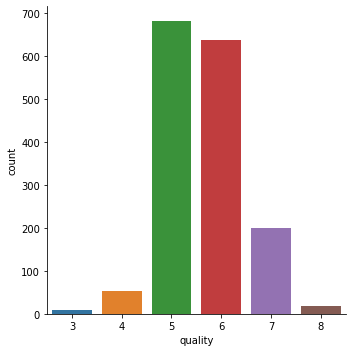

In [10]:
sns.catplot(x='quality',data=wine_data,kind='count')

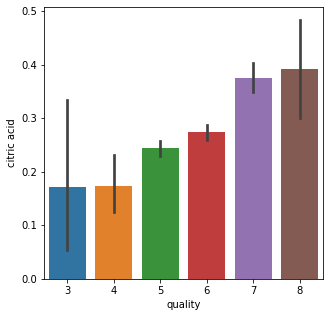

In [15]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)


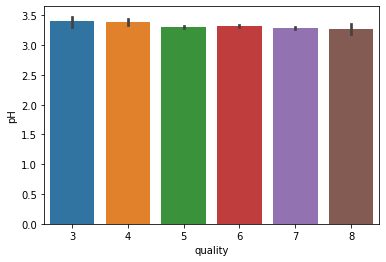

In [16]:
sns.barplot(x='quality',y='pH',data=wine_data)

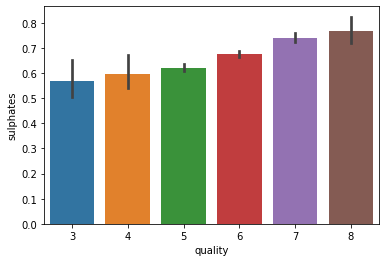

In [17]:
sns.barplot(x='quality',y='sulphates',data=wine_data)

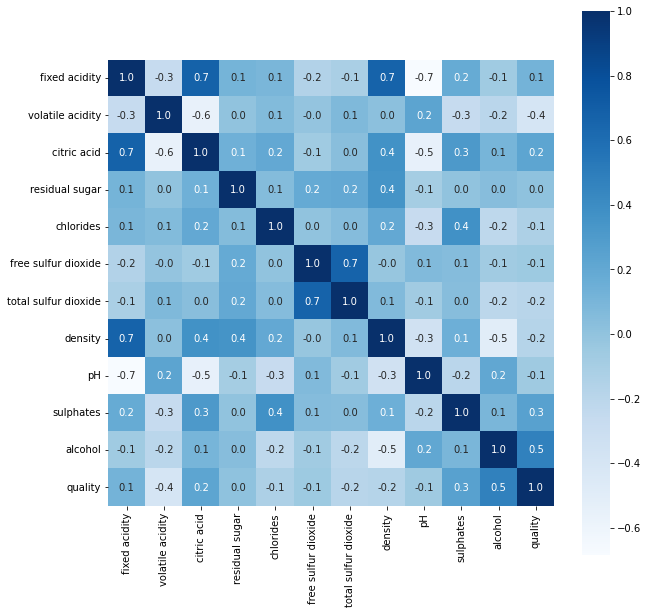

In [22]:
correlation = wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

In [23]:
X = wine_data.drop('quality',axis=1)
Y = wine_data['quality'].apply(lambda y_value :1 if y_value>=7 else 0)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [31]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
ypre_1 = model.predict(x_train)
ypre_2 = model.predict(x_test)
acc_1 = accuracy_score(y_train,ypre_1)
acc_2 = accuracy_score(y_test,ypre_2)
print(acc_2)

0.915625


In [42]:
x_trial = np.array(x_test)
pred = model.predict(x_trial[4].reshape(1,-1))
print(pred,np.array(y_test)[4])

[1] 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
